In [1]:
# カレントディレクトリの変更（自分の作業フォルダのパスを設定）
os.chdir('/Users/narizuka/GoogleDrive/My Drive/document/講義/立正/情報処理の応用/')
# os.chdir("G:\\マイドライブ\\document\\講義\\立正\\情報処理の応用")

NameError: name 'os' is not defined

使用するモジュールのimport

In [14]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
from pandas import DataFrame
from scipy import optimize
import material.fit_func as ff

In [ ]:
pd.set_option('max_rows', 20)  # 表示する行数
pd.set_option('precision', 4)  # 小数点以下の表示桁
np.set_printoptions(suppress=True, precision=4)
%precision 4  # 小数点以下の表示桁

'%r'

google colab を使う際のセッティング

In [1]:
# matplotlibで日本語表示
!pip install japanize-matplotlib
# import matplotlib.pyplot as plt
import japanize_matplotlib

     |████████████████████████████████| 4.1 MB 11.0 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=1cf3a153c2e70762a2bb9902d351625a0bfa88257be25706b5fa1437642023c7
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [2]:
# google driveをマウントする
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# カレントディレクトリを変更（自分の作業フォルダのパスを設定）
import os
os.chdir('/content/drive/My Drive/document/講義/立正/情報処理の応用/')

In [7]:
import sys
sys.path.append('/content/drive/My Drive/program/python')

import science.stats.fitfunc as ff

In [4]:
import matplotlib.pyplot as plt
plt.style.use('/content/drive/My Drive/program/Colab Notebooks/setting/matplotlibrc')

jupyter lab のcssスタイルを変更（必要な場合だけ）

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.jp-Cell { width:100% !important; margin: 0 auto; }</style>"))
with open('./material/variables.css') as f: 
    css = f.read().replace(';', ' !important;')
display(HTML('<style type="text/css">%s</style>'%css))

# 二項分布からポアソン分布へ

## ポアソン分布

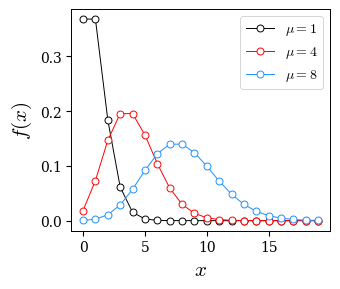

In [15]:
fig, ax = plt.subplots()
k = np.arange(0, 20, 1)
ax.plot(k, ff.po2(k, 1, 1), '-o', mfc='w', ms=5, label='$\mu=1$')
ax.plot(k, ff.po2(k, 4, 1), '-o', mfc='w', ms=5, label='$\mu=4$')
ax.plot(k, ff.po2(k, 8, 1), '-o', mfc='w', ms=5, label='$\mu=8$')
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$f(x)$', fontsize=15)
ax.legend(numpoints=1, fontsize=10, loc='upper right', frameon=True)

# fig.savefig(fpath+'poisson.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True)

# 実例：サッカーとバスケの得点頻度の違いは？

## サッカー（ドイツリーグ）

In [ ]:
score_s = np.loadtxt('./material/sec_4-2/score_germany_h.txt')

In [ ]:
# １試合の平均得点と分散
np.mean(score_s), np.var(score_s)

(1.6013071895424837, 1.6384296638045197)

In [ ]:
f_s, x_s = np.histogram(score_s, bins=[0,1,2,3,4,5,6,7], density=0)

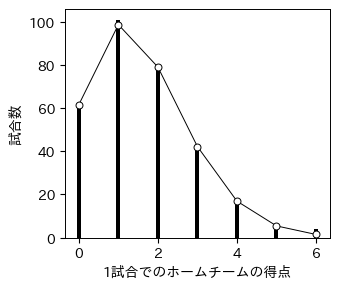

In [ ]:
''' ヒストグラム '''
fig, ax = plt.subplots()
ax.set_xlabel('1試合でのホームチームの得点', fontsize=10)
ax.set_ylabel('試合数', fontsize=10)

# 実データ
ax.bar(x_s[:-1], f_s, width=0.1, color='k')

# ポアソン分布のモデル値
f_s_2 = ff.po(x_s[:-1], np.mean(score_s)) * len(score_s)
ax.plot(x_s[:-1], f_s_2, '-o', mfc='w', ms=5)

fig.savefig('figure/hist_germany.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True)

In [ ]:
'''ヒストグラム（実測値とモデル値の比較）'''
np.c_[x_s[:-1], f_s, f_s_2]

array([[  0.    ,  61.    ,  61.6996],
       [  1.    , 101.    ,  98.8001],
       [  2.    ,  79.    ,  79.1046],
       [  3.    ,  41.    ,  42.2236],
       [  4.    ,  16.    ,  16.9032],
       [  5.    ,   4.    ,   5.4135],
       [  6.    ,   4.    ,   1.4448]])

## NBA

In [ ]:
score_b = np.loadtxt('./material/sec_4-2/score_nba_h.txt')

In [ ]:
# １試合の平均得点と分散
np.mean(score_b), np.var(score_b)

(36.152963671128106, 28.21751989734178)

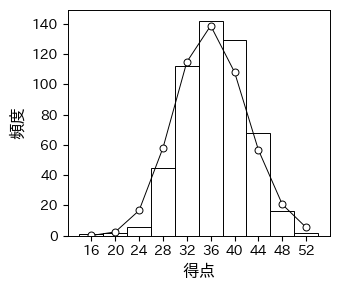

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('得点', fontsize=12)
ax.set_ylabel('頻度', fontsize=12)

BN = np.arange(score_b.min(), score_b.max()+4, 4)
f_b, x = ax.hist(score_b, bins=BN, histtype='bar', color='w', ec='k')[:2]
x_b = 0.5*(x[1:]+x[:-1])  # 横軸に表示する階級値を計算（中央値）
ax.set_xticks(x_b)  

# ポアソン分布のモデル値
f_b_2 = ff.po(x_b, np.mean(score_b)) * len(score_b) * 4
ax.plot(x_b, f_b_2, '-o', mfc='w', ms=5)

fig.savefig('figure/hist_nba.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True)

In [ ]:
'''ヒストグラム（実測値とモデル値の比較）'''
np.c_[x_b, f_b, f_b_2]

array([[ 16.    ,   1.    ,   0.1695],
       [ 20.    ,   2.    ,   2.4905],
       [ 24.    ,   6.    ,  16.6831],
       [ 28.    ,  45.    ,  57.9986],
       [ 32.    , 112.    , 114.8054],
       [ 36.    , 142.    , 138.7313],
       [ 40.    , 129.    , 108.0538],
       [ 44.    ,  68.    ,  56.658 ],
       [ 48.    ,  16.    ,  20.7266],
       [ 52.    ,   2.    ,   5.4496]])